<a href="https://colab.research.google.com/github/Yunshan-CAI/AI_supervision_thesis/blob/main/Classification_second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This is to train a simple nail biting classification model based on internet and "11k Hands" data with two categories.**

# Step1: dataloading and preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from fastai.vision.all import *
from pathlib import Path
path = Path('/content/drive/MyDrive/nail_data/classification_model_2')

In [ ]:
dls = ImageDataLoaders.from_folder(
    path,
    train='train',
    valid='valid',
    item_tfms=[Resize(192, method='squish')]
)

# Step2: Check the data

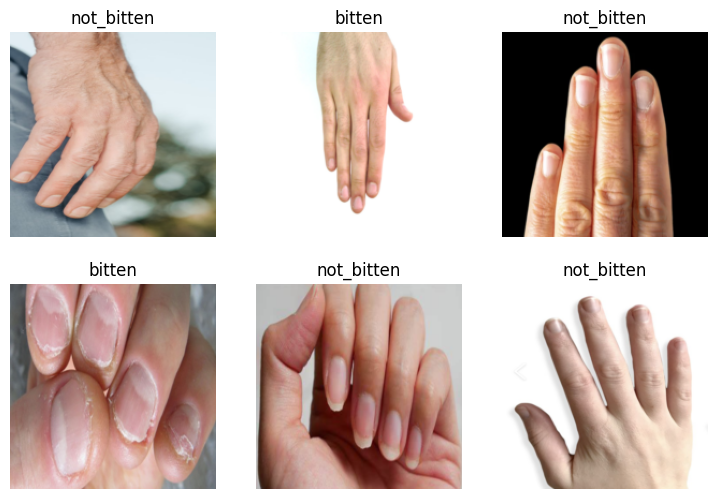

In [ ]:
dls.show_batch(max_n=6, nrows=2)

# Step3: Train the model

In [ ]:
learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 199MB/s]


In [ ]:
learn.fine_tune(10, base_lr=1e-3)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.252124,0.982875,0.500000,0.666667,0.514706,0.571429,01:05


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.671886,0.802175,0.628571,0.666667,0.647059,0.647059,00:10
1,0.626145,0.684956,0.709677,0.666667,0.705882,0.687500,00:10
2,0.542574,0.602083,0.806452,0.757576,0.794118,0.781250,00:10
3,0.440720,0.612181,0.787879,0.787879,0.794118,0.787879,00:10
4,0.368875,0.612444,0.781250,0.757576,0.779412,0.769231,00:09
5,0.303235,0.593321,0.766667,0.696970,0.750000,0.730159,00:10
6,0.254223,0.569979,0.793103,0.696970,0.764706,0.741935,00:10
7,0.225589,0.549151,0.806452,0.757576,0.794118,0.781250,00:09
8,0.196454,0.540133,0.806452,0.757576,0.794118,0.781250,00:09
9,0.173005,0.542061,0.806452,0.757576,0.794118,0.781250,00:10


# Step4: Save the model

In [ ]:
learn.export('/content/drive/MyDrive/nail_data/trained_models/nail_bitten_classifier_2.pkl')

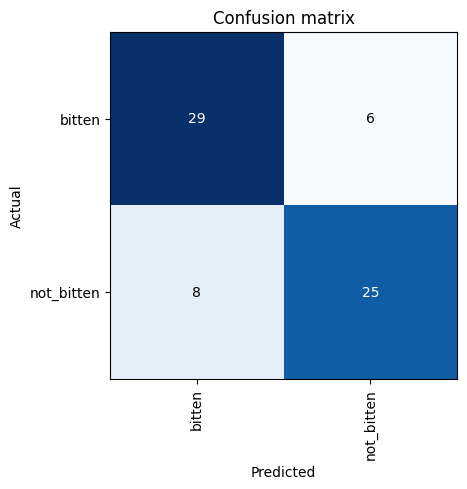

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Step 6: Experimenting with different presizing techniques

In [ ]:
#改进版本1：基础presizing
dls = ImageDataLoaders.from_folder(
    path,
    train='train',
    valid='valid',
    item_tfms=[Resize(460)],  # 先resize到大尺寸，默认crop
    batch_tfms=aug_transforms(size=192, min_scale=0.75)  # GPU上数据增强+最终resize
)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 208MB/s]


In [ ]:
learn.fine_tune(10, base_lr=1e-3)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.123575,0.677238,0.633333,0.575758,0.632353,0.603175,01:42


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.998326,0.599357,0.709677,0.666667,0.705882,0.687500,00:06
1,0.882197,0.532317,0.750000,0.727273,0.750000,0.738462,00:06
2,0.800530,0.502509,0.806452,0.757576,0.794118,0.781250,00:06
3,0.709489,0.493899,0.818182,0.818182,0.823529,0.818182,00:06
4,0.619119,0.504143,0.800000,0.848485,0.823529,0.823529,00:06
5,0.571343,0.530042,0.800000,0.848485,0.823529,0.823529,00:06
6,0.514535,0.554128,0.777778,0.848485,0.808824,0.811594,00:06
7,0.468673,0.564835,0.777778,0.848485,0.808824,0.811594,00:06
8,0.440015,0.564347,0.777778,0.848485,0.808824,0.811594,00:06
9,0.406027,0.566724,0.777778,0.848485,0.808824,0.811594,00:06


In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,  # 从文件夹名获取标签
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(
        size=192,
        min_scale=0.8,
        max_rotate=10,
        max_zoom=1.1,
        max_warp=0.1,
        flip_vert=False
    )
)

dls = dblock.dataloaders(path, bs=16)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 201MB/s]


In [ ]:
learn.fine_tune(10, base_lr=1e-3)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.900877,0.686352,0.666667,0.727273,0.691176,0.695652,00:51


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.786018,0.653627,0.694444,0.757576,0.720588,0.724638,00:04
1,0.678715,0.699701,0.771429,0.818182,0.794118,0.794118,00:03
2,0.580085,0.682344,0.750000,0.818182,0.779412,0.782609,00:04
3,0.481273,0.780610,0.736842,0.848485,0.779412,0.788732,00:03
4,0.375040,0.739998,0.777778,0.848485,0.808824,0.811594,00:04
5,0.289378,0.653804,0.763158,0.878788,0.808824,0.816901,00:04
6,0.261891,0.710742,0.763158,0.878788,0.808824,0.816901,00:04
7,0.225212,0.722078,0.794118,0.818182,0.808824,0.805970,00:03
8,0.203585,0.677244,0.818182,0.818182,0.823529,0.818182,00:04
9,0.196794,0.683326,0.794118,0.818182,0.808824,0.805970,00:04


# Step 7: Experimenting with different learning rate

In [ ]:
# 1. 创建learner（但不要训练）
learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 210MB/s]


SuggestedLRs(valley=0.0005754399462603033)

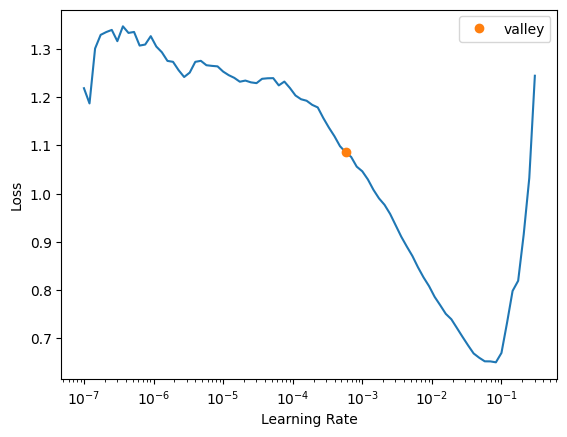

In [ ]:
# 2. 运行lr_find
learn.lr_find()

In [ ]:
#Valley Point（FastAI推荐）
learn.fine_tune(10, base_lr=5.75e-4)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.249521,0.939189,0.537037,0.878788,0.573529,0.666667,00:54


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.233792,0.819869,0.634146,0.787879,0.676471,0.702703,00:06
1,1.016506,0.697446,0.625000,0.757576,0.661765,0.684932,00:05
2,0.835431,0.631324,0.714286,0.757576,0.735294,0.735294,00:05
3,0.709538,0.563477,0.781250,0.757576,0.779412,0.769231,00:05
4,0.605390,0.546412,0.781250,0.757576,0.779412,0.769231,00:06
5,0.524378,0.538907,0.774194,0.727273,0.764706,0.750000,00:05
6,0.452167,0.524053,0.800000,0.727273,0.779412,0.761905,00:05
7,0.395784,0.513854,0.827586,0.727273,0.794118,0.774194,00:06
8,0.346514,0.505263,0.827586,0.727273,0.794118,0.774194,00:05
9,0.313845,0.504191,0.827586,0.727273,0.794118,0.774194,00:05


In [ ]:
#稍微激进一点 (最陡下降区域左侧)
learn.fine_tune(10, base_lr=1e-4)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.535306,1.510665,0.750000,0.090909,0.544118,0.162162,00:53


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.437645,1.173814,0.350000,0.212121,0.426471,0.264151,00:05
1,1.363709,0.977638,0.483871,0.454545,0.500000,0.468750,00:05
2,1.294311,0.860261,0.486486,0.545455,0.500000,0.514286,00:05
3,1.257122,0.772883,0.552632,0.636364,0.573529,0.591549,00:05
4,1.153415,0.718057,0.578947,0.666667,0.602941,0.619718,00:05
5,1.091564,0.690192,0.583333,0.636364,0.602941,0.608696,00:05
6,1.020162,0.676680,0.594595,0.666667,0.617647,0.628571,00:05
7,0.958187,0.674002,0.611111,0.666667,0.632353,0.637681,00:06
8,0.909098,0.668713,0.611111,0.666667,0.632353,0.637681,00:05
9,0.880223,0.673869,0.611111,0.666667,0.632353,0.637681,00:05


In [ ]:
learn.fine_tune(10, base_lr=2e-3)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.105380,1.383567,0.875000,0.424242,0.691176,0.571429,00:36


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.751811,0.954836,1.000000,0.424242,0.720588,0.595745,00:06
1,0.575013,0.600981,0.909091,0.606061,0.779412,0.727273,00:05
2,0.438405,0.516635,0.777778,0.636364,0.735294,0.700000,00:06
3,0.338058,0.505612,0.774194,0.727273,0.764706,0.750000,00:06
4,0.267330,0.569581,0.750000,0.727273,0.750000,0.738462,00:05
5,0.220264,0.700683,0.727273,0.727273,0.735294,0.727273,00:05
6,0.184413,0.750622,0.705882,0.727273,0.720588,0.716418,00:05
7,0.158088,0.725237,0.714286,0.757576,0.735294,0.735294,00:05
8,0.138020,0.709518,0.735294,0.757576,0.750000,0.746269,00:05
9,0.121007,0.696952,0.727273,0.727273,0.735294,0.727273,00:06


In [ ]:
learn.fine_tune(10, base_lr=3e-3)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.180521,0.950331,0.564103,0.666667,0.588235,0.611111,01:55


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.565326,0.761980,0.568182,0.757576,0.602941,0.649351,00:05
1,0.424260,0.611169,0.658537,0.818182,0.705882,0.729730,00:06
2,0.307475,0.696064,0.700000,0.848485,0.750000,0.767123,00:06
3,0.252026,0.723743,0.750000,0.909091,0.808824,0.821918,00:06
4,0.200280,0.654252,0.818182,0.818182,0.823529,0.818182,00:05
5,0.163282,0.518073,0.806452,0.757576,0.794118,0.781250,00:05
6,0.136671,0.499589,0.812500,0.787879,0.808824,0.800000,00:05
7,0.114931,0.505523,0.787879,0.787879,0.794118,0.787879,00:05
8,0.098039,0.514111,0.812500,0.787879,0.808824,0.800000,00:05
9,0.085551,0.517426,0.812500,0.787879,0.808824,0.800000,00:06


In [ ]:
learn.fine_tune(10, base_lr=5e-3)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.232723,1.045325,0.709677,0.666667,0.705882,0.687500,01:04


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.565238,0.602085,0.684211,0.787879,0.720588,0.732394,00:05
1,0.376099,0.896468,0.736842,0.848485,0.779412,0.788732,00:05
2,0.307794,0.784290,0.742857,0.787879,0.764706,0.764706,00:05
3,0.238661,1.074525,0.735294,0.757576,0.750000,0.746269,00:05
4,0.189954,0.983849,0.800000,0.727273,0.779412,0.761905,00:05
5,0.155834,1.150802,0.741935,0.696970,0.735294,0.718750,00:05
6,0.130106,1.293945,0.727273,0.727273,0.735294,0.727273,00:05
7,0.109614,1.314489,0.727273,0.727273,0.735294,0.727273,00:05
8,0.093338,1.273701,0.750000,0.727273,0.750000,0.738462,00:05
9,0.081721,1.250878,0.735294,0.757576,0.750000,0.746269,00:05


In [ ]:
learn.fine_tune(10, base_lr=7e-3)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.033406,1.109078,0.666667,0.787879,0.705882,0.722222,00:59


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.533634,0.651822,0.714286,0.909091,0.779412,0.800000,00:31
1,0.332060,0.552357,0.892857,0.757576,0.838235,0.819672,00:30
2,0.238195,0.894687,0.851852,0.696970,0.794118,0.766667,00:30
3,0.191872,1.569799,0.789474,0.909091,0.838235,0.845070,00:30
4,0.153024,1.900774,0.731707,0.909091,0.794118,0.810811,00:30
5,0.130216,1.871707,0.769231,0.909091,0.823529,0.833333,00:31
6,0.114164,1.755638,0.763158,0.878788,0.808824,0.816901,00:30
7,0.098422,1.606017,0.783784,0.878788,0.823529,0.828571,00:32
8,0.085855,1.463157,0.805556,0.878788,0.838235,0.840580,00:30
9,0.075051,1.349011,0.805556,0.878788,0.838235,0.840580,00:31


In [ ]:
learn.fine_tune(10, base_lr=7e-3)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.256515,1.543624,0.620000,0.939394,0.691176,0.746988,01:01


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.459485,1.695196,0.559322,1.000000,0.617647,0.717391,00:05
1,0.421059,1.163937,0.682927,0.848485,0.735294,0.756757,00:05
2,0.349478,2.014474,0.600000,0.909091,0.661765,0.722892,00:05
3,0.281942,2.208953,0.697674,0.909091,0.764706,0.789474,00:05
4,0.244087,1.649501,0.673913,0.939394,0.750000,0.784810,00:05
5,0.204067,1.304755,0.690476,0.878788,0.750000,0.773333,00:05
6,0.169957,1.131909,0.800000,0.848485,0.823529,0.823529,00:05
7,0.146323,1.235814,0.843750,0.818182,0.838235,0.830769,00:05
8,0.125338,1.186975,0.843750,0.818182,0.838235,0.830769,00:05
9,0.110641,1.136333,0.900000,0.818182,0.867647,0.857143,00:05


# Step 8: Experimenting with different discriminative learning rates

In [ ]:
#标准Discriminative LR
learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 377MB/s]


In [ ]:
# 第一阶段：冻结预训练层，只训练分类头
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.066343,1.478754,0.534483,0.939394,0.573529,0.681319,00:43
1,0.787453,1.731671,0.561404,0.969697,0.617647,0.711111,00:17
2,0.647178,1.263851,0.603774,0.969697,0.676471,0.744186,00:17


In [ ]:
# 第二阶段：解冻并使用discriminative learning rates
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.295740,0.866844,0.666667,0.909091,0.735294,0.769231,00:23
1,0.316764,0.677205,0.722222,0.787879,0.750000,0.753623,00:23
2,0.267639,0.613146,0.742857,0.787879,0.764706,0.764706,00:23
3,0.219044,0.579491,0.764706,0.787879,0.779412,0.776119,00:24
4,0.193387,0.564869,0.806452,0.757576,0.794118,0.781250,00:24
5,0.161250,0.564937,0.862069,0.757576,0.823529,0.806452,00:24
6,0.139051,0.559490,0.862069,0.757576,0.823529,0.806452,00:23
7,0.122087,0.563886,0.862069,0.757576,0.823529,0.806452,00:23
8,0.108469,0.563137,0.862069,0.757576,0.823529,0.806452,00:23
9,0.097764,0.562661,0.862069,0.757576,0.823529,0.806452,00:25


In [ ]:
# 更激进的范围（基于你的lr_find结果）
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.136086,0.636696,0.685714,0.727273,0.705882,0.705882,01:43
1,0.769463,0.680014,0.722222,0.787879,0.750000,0.753623,00:05
2,0.601812,0.646644,0.727273,0.727273,0.735294,0.727273,00:05


In [ ]:
learn.unfreeze()
# 使用更大的学习率范围
learn.fit_one_cycle(12, lr_max=slice(5e-5, 3e-3))

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.217875,0.629330,0.735294,0.757576,0.750000,0.746269,00:05
1,0.148696,0.631538,0.794118,0.818182,0.808824,0.805970,00:05
2,0.121455,1.736198,0.777778,0.636364,0.735294,0.700000,00:05
3,0.113820,1.290978,0.666667,0.787879,0.705882,0.722222,00:05
4,0.140311,2.327402,0.781250,0.757576,0.779412,0.769231,00:05
5,0.150919,1.794799,0.771429,0.818182,0.794118,0.794118,00:05
6,0.161877,1.928386,0.763158,0.878788,0.808824,0.816901,00:05
7,0.153112,1.759843,0.763158,0.878788,0.808824,0.816901,00:05
8,0.133924,1.710408,0.700000,0.848485,0.750000,0.767123,00:05
9,0.122485,1.590601,0.707317,0.878788,0.764706,0.783784,00:05


In [ ]:
#三层不同学习率
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.259552,0.988394,0.697674,0.909091,0.764706,0.789474,00:50
1,0.872146,1.603358,0.589286,1.000000,0.661765,0.741573,00:07
2,0.655520,1.368448,0.607843,0.939394,0.676471,0.738095,00:06


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6, 1e-5, 1e-4))

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.298571,1.083438,0.638298,0.909091,0.705882,0.750000,00:09
1,0.267122,0.920651,0.681818,0.909091,0.750000,0.779221,00:09
2,0.267692,0.820627,0.674419,0.878788,0.735294,0.763158,00:09
3,0.249306,0.758419,0.682927,0.848485,0.735294,0.756757,00:09
4,0.228317,0.736736,0.675000,0.818182,0.720588,0.739726,00:10
5,0.211904,0.696873,0.702703,0.787879,0.735294,0.742857,00:09
6,0.193648,0.685763,0.702703,0.787879,0.735294,0.742857,00:08
7,0.180582,0.676329,0.722222,0.787879,0.750000,0.753623,00:08
8,0.176974,0.665608,0.722222,0.787879,0.750000,0.753623,00:09
9,0.172305,0.667095,0.702703,0.787879,0.735294,0.742857,00:09


# Step 9: Experimenting with different architecture

In [ ]:
# resnet50
learn = vision_learner(dls, resnet50, metrics=[Precision(),Recall(),accuracy,F1Score()])

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 212MB/s]


In [ ]:
learn.fine_tune(10, base_lr=1e-3)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.077250,0.644038,0.730769,0.575758,0.691176,0.644068,00:48


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.678034,0.609867,0.840000,0.636364,0.764706,0.724138,00:05
1,0.586255,0.520812,0.814815,0.666667,0.764706,0.733333,00:06
2,0.460568,0.512507,0.777778,0.636364,0.735294,0.700000,00:05
3,0.388127,0.556102,0.807692,0.636364,0.750000,0.711864,00:05
4,0.325620,0.619266,0.793103,0.696970,0.764706,0.741935,00:05
5,0.264699,0.745848,0.821429,0.696970,0.779412,0.754098,00:05
6,0.222176,0.849230,0.821429,0.696970,0.779412,0.754098,00:05
7,0.192142,0.920028,0.827586,0.727273,0.794118,0.774194,00:05
8,0.166807,0.963584,0.774194,0.727273,0.764706,0.750000,00:05
9,0.148665,0.965650,0.774194,0.727273,0.764706,0.750000,00:05


In [ ]:
# EfficientNet-B0 - 效率很高的现代架构
learn = vision_learner(dls, efficientnet_b0, metrics=[Precision(),Recall(),accuracy,F1Score()])

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 129MB/s] 


In [ ]:
learn.fine_tune(10, base_lr=1e-3)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.242825,0.966625,0.772727,0.515152,0.691176,0.618182,00:42


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.797926,0.906831,0.761905,0.484848,0.676471,0.592593,00:05
1,0.689022,0.722837,0.777778,0.636364,0.735294,0.700000,00:05
2,0.637204,0.719286,0.807692,0.636364,0.750000,0.711864,00:05
3,0.585941,0.679077,0.800000,0.727273,0.779412,0.761905,00:05
4,0.514963,0.716846,0.806452,0.757576,0.794118,0.781250,00:05
5,0.460434,0.797901,0.800000,0.727273,0.779412,0.761905,00:05
6,0.417009,0.802142,0.806452,0.757576,0.794118,0.781250,00:05
7,0.373905,0.776235,0.812500,0.787879,0.808824,0.800000,00:05
8,0.344934,0.765359,0.812500,0.787879,0.808824,0.800000,00:05
9,0.334950,0.770470,0.781250,0.757576,0.779412,0.769231,00:05


# Step 10: See model performance with best presizing, learning rate and architecture

In [ ]:
dls = ImageDataLoaders.from_folder(
    path,
    train='train',
    valid='valid',
    item_tfms=[Resize(460)],  # 先resize到大尺寸，默认crop
    batch_tfms=aug_transforms(size=192, min_scale=0.75)  # GPU上数据增强+最终resize
)

In [ ]:
learn = vision_learner(dls, efficientnet_b0, metrics=[Precision(),Recall(),accuracy,F1Score()])

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 119MB/s] 


In [ ]:
learn.fine_tune(15, base_lr=3e-3)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.222300,0.858996,0.833333,0.757576,0.808824,0.793651,00:06


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.262510,0.765245,0.806452,0.757576,0.794118,0.781250,00:05
1,0.222556,0.769315,0.781250,0.757576,0.779412,0.769231,00:05
2,0.204719,0.706997,0.781250,0.757576,0.779412,0.769231,00:05
3,0.191923,0.739851,0.787879,0.787879,0.794118,0.787879,00:06
4,0.199277,0.804075,0.794118,0.818182,0.808824,0.805970,00:05
5,0.194217,0.801554,0.818182,0.818182,0.823529,0.818182,00:05
6,0.191643,0.901312,0.843750,0.818182,0.838235,0.830769,00:05
7,0.184798,0.908031,0.843750,0.818182,0.838235,0.830769,00:05
8,0.181004,0.776987,0.794118,0.818182,0.808824,0.805970,00:05
9,0.185166,0.735803,0.843750,0.818182,0.838235,0.830769,00:05


In [ ]:
learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 179MB/s]


In [ ]:
learn.fine_tune(15, base_lr=3e-3)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.066652,0.832503,0.842105,0.484848,0.705882,0.615385,00:35


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.753402,0.542668,0.736842,0.848485,0.779412,0.788732,00:06
1,0.681590,0.527931,0.700000,0.848485,0.750000,0.767123,00:05
2,0.586234,0.439066,0.710526,0.818182,0.750000,0.760563,00:05
3,0.502458,0.526146,0.725000,0.878788,0.779412,0.794521,00:05
4,0.445348,0.671990,0.736842,0.848485,0.779412,0.788732,00:05
5,0.386645,0.729362,0.800000,0.848485,0.823529,0.823529,00:05
6,0.335373,0.797093,0.848485,0.848485,0.852941,0.848485,00:05
7,0.307113,0.588292,0.848485,0.848485,0.852941,0.848485,00:05
8,0.278262,0.619573,0.756757,0.848485,0.794118,0.800000,00:05
9,0.248504,0.711635,0.756757,0.848485,0.794118,0.800000,00:05


In [ ]:
learn = vision_learner(dls, efficientnet_b0, metrics=[Precision(),Recall(),accuracy,F1Score()])

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 177MB/s]


In [ ]:
learn.fine_tune(15, base_lr=7e-3)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.975586,0.937242,0.600000,0.727273,0.632353,0.657534,00:58


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.533647,0.997619,0.692308,0.818182,0.735294,0.750000,00:07
1,0.470724,1.034835,0.659091,0.878788,0.720588,0.753247,00:07
2,0.491976,1.120034,0.613636,0.818182,0.661765,0.701299,00:07
3,0.477439,1.351513,0.741935,0.696970,0.735294,0.718750,00:06
4,0.442872,1.311890,0.692308,0.818182,0.735294,0.750000,00:06
5,0.415084,1.546552,0.645833,0.939394,0.720588,0.765432,00:07
6,0.404774,1.447224,0.702703,0.787879,0.735294,0.742857,00:07
7,0.380731,1.220084,0.742857,0.787879,0.764706,0.764706,00:06
8,0.367206,0.903271,0.771429,0.818182,0.794118,0.794118,00:06
9,0.336197,0.854259,0.794118,0.818182,0.808824,0.805970,00:07


# Step 11: Experimenting with progressive resizing

In [ ]:
# 创建获取DataLoaders的函数
def get_dls(size, bs=16):
    return ImageDataLoaders.from_folder(
        path,
        train='train',
        valid='valid',
        item_tfms=[Resize(size, method='squish')],
        bs=bs
    )

In [ ]:
# Stage 1: 小尺寸快速训练
print("Stage 1: 小尺寸训练 (128x128)")
dls = get_dls(128, bs=32)  # 小图像可以用更大的batch size
learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])
learn.fit_one_cycle(4, 3e-3)  # 用你找到的最佳学习率

Stage 1: 小尺寸训练 (128x128)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 232MB/s]


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.193530,0.611181,0.806452,0.757576,0.794118,0.781250,01:01
1,0.799566,0.825483,0.717949,0.848485,0.764706,0.777778,00:03
2,0.611997,0.906956,0.675000,0.818182,0.720588,0.739726,00:04
3,0.471576,0.791503,0.756757,0.848485,0.794118,0.800000,00:03


In [ ]:
# Stage 2: 大尺寸精细训练
print("Stage 2: 大尺寸训练 (224x224)")
learn.dls = get_dls(224, bs=16)  # 大图像用小一点的batch size
learn.fine_tune(6, 1e-3)  # 更低的学习率精细调整

Stage 2: 大尺寸训练 (224x224)


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.514330,0.778330,0.684211,0.787879,0.720588,0.732394,00:03


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.590200,0.743475,0.787879,0.787879,0.794118,0.787879,00:03
1,0.403767,0.773500,0.903226,0.848485,0.882353,0.875000,00:03
2,0.300868,0.637278,0.903226,0.848485,0.882353,0.875000,00:03
3,0.244964,0.762767,0.892857,0.757576,0.838235,0.819672,00:03
4,0.201568,0.667192,0.870968,0.818182,0.852941,0.843750,00:03
5,0.172991,0.643201,0.870968,0.818182,0.852941,0.843750,00:03


In [ ]:
# 使用你发现的最佳参数组合
def get_dls_optimized(size, bs=16):
    return ImageDataLoaders.from_folder(
        path,
        train='train',
        valid='valid',
        item_tfms=[Resize(460 if size > 192 else size)],  # 大尺寸用presizing
        batch_tfms=aug_transforms(size=size, min_scale=0.75) if size > 192 else None,
        bs=bs
    )

In [ ]:
# Stage 1: 小尺寸 + 你的最佳学习率
print("Stage 1: 小尺寸训练 (128x128)")
dls = get_dls_optimized(128, bs=32)
learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])
learn.fit_one_cycle(4, 3e-3)  # 你的最佳学习率

Stage 1: 小尺寸训练 (128x128)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 224MB/s]


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.933365,0.947314,0.785714,0.666667,0.750000,0.721311,00:57
1,0.695693,0.869891,0.764706,0.787879,0.779412,0.776119,00:03
2,0.565028,0.999844,0.742857,0.787879,0.764706,0.764706,00:03
3,0.485152,0.837084,0.806452,0.757576,0.794118,0.781250,00:03


In [ ]:
# Stage 2: 大尺寸 + 最佳presizing + 最佳学习率
print("Stage 2: 大尺寸训练 (192x192)")
learn.dls = get_dls_optimized(192, bs=16)
learn.fine_tune(6, 3e-3)  # 继续用你的最佳学习率

Stage 2: 大尺寸训练 (192x192)


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.574685,0.824940,0.690476,0.878788,0.750000,0.773333,00:03


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.487470,0.699230,0.833333,0.757576,0.808824,0.793651,00:02
1,0.445313,1.407830,0.937500,0.454545,0.720588,0.612245,00:03
2,0.419720,1.363603,0.666667,0.787879,0.705882,0.722222,00:02
3,0.356289,0.604361,0.843750,0.818182,0.838235,0.830769,00:02
4,0.246659,0.509407,0.852941,0.878788,0.867647,0.865672,00:03
5,0.187013,0.528343,0.838710,0.787879,0.823529,0.812500,00:03


In [ ]:
# 创建获取DataLoaders的函数
def get_dls(size, bs=16):
    return ImageDataLoaders.from_folder(
        path,
        train='train',
        valid='valid',
        item_tfms=[Resize(size, method='squish')],
        bs=bs
    )

In [ ]:
# 四阶段渐进式训练参数
stages = [
    (96, 32, 3, 3e-3),   # (size, batch_size, epochs, lr)
    (128, 24, 4, 3e-3),
    (192, 16, 4, 2e-3),
    (224, 16, 6, 1e-3)   # 最后用更低学习率精细调整
]

print("🚀 开始四阶段Progressive Resizing训练")
print("="*60)

🚀 开始四阶段Progressive Resizing训练


In [ ]:
import gc

learn = None
for i, (size, bs, epochs, lr) in enumerate(stages):
    print(f"\n📍 Stage {i+1}/4: {size}x{size}, batch_size={bs}, epochs={epochs}, lr={lr}")
    print("-" * 40)

    if learn is None:
        # 第一阶段：创建新的learner
        print("✨ 创建新的learner...")
        dls = get_dls(size, bs)
        learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])
        print(f"🎯 开始Stage {i+1}训练...")
        learn.fit_one_cycle(epochs, lr)
    else:
        # 后续阶段：替换DataLoaders并继续训练
        print("🔄 更新DataLoaders...")

        # 清理GPU内存
        torch.cuda.empty_cache()
        gc.collect()

        # 更新DataLoaders
        learn.dls = get_dls(size, bs)

        print(f"🎯 开始Stage {i+1}训练...")
        learn.fit_one_cycle(epochs, lr)

    # 显示当前阶段结果
    print(f"✅ Stage {i+1} 完成!")


📍 Stage 1/4: 96x96, batch_size=32, epochs=3, lr=0.003
----------------------------------------
✨ 创建新的learner...
🎯 开始Stage 1训练...


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.877973,0.771165,0.739130,0.515152,0.676471,0.607143,00:33
1,0.699089,0.751066,0.735294,0.757576,0.750000,0.746269,00:10
2,0.539194,0.795016,0.735294,0.757576,0.750000,0.746269,00:09


✅ Stage 1 完成!

📍 Stage 2/4: 128x128, batch_size=24, epochs=4, lr=0.003
----------------------------------------
🔄 更新DataLoaders...
🎯 开始Stage 2训练...


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.500420,0.908679,0.591837,0.878788,0.647059,0.707317,00:11
1,0.383006,1.006222,0.621622,0.696970,0.647059,0.657143,00:12
2,0.314378,1.418341,0.648649,0.727273,0.676471,0.685714,00:11
3,0.261829,1.260721,0.631579,0.727273,0.661765,0.676056,00:11


✅ Stage 2 完成!

📍 Stage 3/4: 192x192, batch_size=16, epochs=4, lr=0.002
----------------------------------------
🔄 更新DataLoaders...
🎯 开始Stage 3训练...


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.535954,0.922073,0.724138,0.636364,0.705882,0.677419,00:20
1,0.384160,0.581714,0.729730,0.818182,0.764706,0.771429,00:20
2,0.301140,0.585050,0.787879,0.787879,0.794118,0.787879,00:20
3,0.256357,0.576422,0.764706,0.787879,0.779412,0.776119,00:19


✅ Stage 3 完成!

📍 Stage 4/4: 224x224, batch_size=16, epochs=6, lr=0.001
----------------------------------------
🔄 更新DataLoaders...
🎯 开始Stage 4训练...


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.287767,0.671306,0.742857,0.787879,0.764706,0.764706,00:25
1,0.251456,0.614019,0.781250,0.757576,0.779412,0.769231,00:26
2,0.173235,0.620657,0.771429,0.818182,0.794118,0.794118,00:25
3,0.148603,0.680864,0.757576,0.757576,0.764706,0.757576,00:25
4,0.114182,0.680847,0.781250,0.757576,0.779412,0.769231,00:25
5,0.119169,0.670673,0.781250,0.757576,0.779412,0.769231,00:26


✅ Stage 4 完成!


In [ ]:
print("\n" + "="*60)
print("🏆 四阶段Progressive Resizing训练完成!")
print("="*60)

# 显示最终结果（可选）
print("\n📊 最终验证结果:")
learn.validate()


🏆 四阶段Progressive Resizing训练完成!

📊 最终验证结果:


(#5) [0.6706728935241699,0.78125,0.7575757575757576,0.779411792755127,0.7692307692307693]

# Step 12: Experimenting with test time agumentation

In [ ]:
learn.fine_tune(10, base_lr=1e-3)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.145579,0.966184,0.517857,0.878788,0.544118,0.651685,00:41


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.717942,0.705222,0.595238,0.757576,0.632353,0.666667,00:05
1,0.565973,0.613863,0.685714,0.727273,0.705882,0.705882,00:05
2,0.475057,0.536835,0.821429,0.696970,0.779412,0.754098,00:05
3,0.413065,0.489385,0.857143,0.727273,0.808824,0.786885,00:05
4,0.346459,0.491522,0.888889,0.727273,0.823529,0.800000,00:05
5,0.293146,0.477462,0.888889,0.727273,0.823529,0.800000,00:05
6,0.251623,0.465122,0.862069,0.757576,0.823529,0.806452,00:05
7,0.214946,0.462065,0.862069,0.757576,0.823529,0.806452,00:05
8,0.187887,0.465194,0.866667,0.787879,0.838235,0.825397,00:05
9,0.165324,0.468719,0.866667,0.787879,0.838235,0.825397,00:05


In [ ]:
print("\n🔍 开始TTA测试...")

# 普通验证结果
normal_results = learn.validate()
normal_acc = float(normal_results[2])
normal_precision = float(normal_results[0])
normal_recall = float(normal_results[1])
normal_f1 = float(normal_results[3])

# TTA增强预测
preds_tta, targs = learn.tta()
tta_acc = accuracy(preds_tta, targs).item()

# 计算TTA的其他指标
preds_class = preds_tta.argmax(dim=1)
from sklearn.metrics import precision_score, recall_score, f1_score
tta_precision = precision_score(targs, preds_class, average='weighted')
tta_recall = recall_score(targs, preds_class, average='weighted')
tta_f1 = f1_score(targs, preds_class, average='weighted')

# 结果对比
print(f"\n📊 结果对比:")
print(f"普通验证 - 准确率: {normal_acc*100:.2f}%, F1: {normal_f1*100:.2f}%")
print(f"TTA增强 - 准确率: {tta_acc*100:.2f}%, F1: {tta_f1*100:.2f}%")
print(f"🚀 TTA提升: 准确率 {(tta_acc-normal_acc)*100:+.2f}%, F1 {(tta_f1-normal_f1)*100:+.2f}%")



🔍 开始TTA测试...



📊 结果对比:
普通验证 - 准确率: 78.79%, F1: 83.82%
TTA增强 - 准确率: 83.82%, F1: 83.77%
🚀 TTA提升: 准确率 +5.04%, F1 -0.05%


# Step 13: Experimenting with label smoothing

In [ ]:
import timm
model = timm.create_model('resnet34', pretrained=True, num_classes=dls.c)
learn = Learner(dls, model,
                loss_func=LabelSmoothingCrossEntropy(),
                metrics=[Precision(),Recall(),accuracy,F1Score()])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

In [ ]:
learn.fine_tune(10, base_lr=1e-3)

epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.683421,0.683659,0.727273,0.242424,0.588235,0.363636,01:59


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.592386,0.654984,0.750000,0.545455,0.691176,0.631579,00:05
1,0.568923,0.636903,0.785714,0.666667,0.750000,0.721311,00:05
2,0.544173,0.633824,0.735294,0.757576,0.750000,0.746269,00:05
3,0.509738,0.591138,0.694444,0.757576,0.720588,0.724638,00:05
4,0.472723,0.570398,0.666667,0.787879,0.705882,0.722222,00:05
5,0.437478,0.563366,0.666667,0.787879,0.705882,0.722222,00:05
6,0.411040,0.523229,0.714286,0.757576,0.735294,0.735294,00:05
7,0.385538,0.516014,0.757576,0.757576,0.764706,0.757576,00:05
8,0.364486,0.509537,0.781250,0.757576,0.779412,0.769231,00:05
9,0.346317,0.505922,0.800000,0.727273,0.779412,0.761905,00:05


# Step 14: Optimize weight_decay parameters

In [ ]:
# 实验不同的weight_decay值
weight_decays = [0.01, 0.1, 0.3]  # 默认是0.01

results = []
for wd in weight_decays:
    print(f"\n🧪 测试Weight Decay = {wd}")

    learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])
    learn.fine_tune(10, base_lr=1e-3, wd=wd)

    # 记录结果
    val_results = learn.validate()
    accuracy_score = float(val_results[2]) * 100
    f1_score = float(val_results[3]) * 100

    results.append({
        'weight_decay': wd,
        'accuracy': accuracy_score,
        'f1': f1_score
    })

    print(f"准确率: {accuracy_score:.2f}%, F1: {f1_score:.2f}%")

# 结果对比
print(f"\n📊 Weight Decay对比结果:")
for result in results:
    print(f"WD={result['weight_decay']}: Acc={result['accuracy']:.2f}%, F1={result['f1']:.2f}%")


🧪 测试Weight Decay = 0.01


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 451MB/s]


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.438959,0.651065,0.685714,0.727273,0.705882,0.705882,00:55


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.983747,0.494375,0.781250,0.757576,0.779412,0.769231,00:07
1,0.842431,0.386917,0.763158,0.878788,0.808824,0.816901,00:08
2,0.657030,0.310138,0.852941,0.878788,0.867647,0.865672,00:09
3,0.541187,0.316487,0.800000,0.848485,0.823529,0.823529,00:08
4,0.439838,0.312046,0.875000,0.848485,0.867647,0.861538,00:09
5,0.361924,0.330816,0.875000,0.848485,0.867647,0.861538,00:08
6,0.305160,0.338490,0.903226,0.848485,0.882353,0.875000,00:09
7,0.264199,0.339736,0.933333,0.848485,0.897059,0.888889,00:08
8,0.231223,0.340082,0.933333,0.848485,0.897059,0.888889,00:09
9,0.201822,0.341516,0.933333,0.848485,0.897059,0.888889,00:08


准确率: 84.85%, F1: 89.71%

🧪 测试Weight Decay = 0.1


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.289801,0.738579,0.764706,0.393939,0.647059,0.520000,00:06


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.684715,0.620724,0.730769,0.575758,0.691176,0.644068,00:08
1,0.594893,0.529360,0.741935,0.696970,0.735294,0.718750,00:09
2,0.498436,0.507176,0.750000,0.818182,0.779412,0.782609,00:08
3,0.419889,0.474010,0.756757,0.848485,0.794118,0.800000,00:09
4,0.345126,0.429687,0.729730,0.818182,0.764706,0.771429,00:10
5,0.286279,0.432024,0.750000,0.818182,0.779412,0.782609,00:08
6,0.245007,0.447303,0.750000,0.818182,0.779412,0.782609,00:08
7,0.210831,0.459368,0.750000,0.818182,0.779412,0.782609,00:09
8,0.183663,0.459775,0.750000,0.818182,0.779412,0.782609,00:09
9,0.160381,0.457469,0.750000,0.818182,0.779412,0.782609,00:10


准确率: 81.82%, F1: 77.94%

🧪 测试Weight Decay = 0.3


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,1.263413,0.824393,0.612245,0.909091,0.676471,0.731707,00:06


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.755575,0.706415,0.718750,0.696970,0.720588,0.707692,00:08
1,0.683915,0.619323,0.750000,0.727273,0.750000,0.738462,00:09
2,0.564311,0.553575,0.757576,0.757576,0.764706,0.757576,00:09
3,0.443767,0.517165,0.757576,0.757576,0.764706,0.757576,00:09
4,0.364380,0.502590,0.806452,0.757576,0.794118,0.781250,00:10
5,0.301541,0.479200,0.838710,0.787879,0.823529,0.812500,00:09
6,0.254868,0.471560,0.862069,0.757576,0.823529,0.806452,00:09
7,0.216597,0.468089,0.862069,0.757576,0.823529,0.806452,00:10
8,0.186849,0.472609,0.862069,0.757576,0.823529,0.806452,00:09
9,0.163347,0.472587,0.892857,0.757576,0.838235,0.819672,00:09


准确率: 75.76%, F1: 83.82%

📊 Weight Decay对比结果:
WD=0.01: Acc=84.85%, F1=89.71%
WD=0.1: Acc=81.82%, F1=77.94%
WD=0.3: Acc=75.76%, F1=83.82%


# Save a good performance model and test (progressive resizing)--not good enough

In [ ]:
# 创建获取DataLoaders的函数
def get_dls(size, bs=16):
    return ImageDataLoaders.from_folder(
        path,
        train='train',
        valid='valid',
        item_tfms=[Resize(size, method='squish')],
        bs=bs
    )

In [ ]:
# Stage 1: 小尺寸快速训练
print("Stage 1: 小尺寸训练 (128x128)")
dls = get_dls(128, bs=32)  # 小图像可以用更大的batch size
learn = vision_learner(dls, resnet34, metrics=[Precision(),Recall(),accuracy,F1Score()])
learn.fit_one_cycle(4, 3e-3)  # 用你找到的最佳学习率

Stage 1: 小尺寸训练 (128x128)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 189MB/s]


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.983398,0.643632,0.717949,0.848485,0.764706,0.777778,00:31
1,0.663861,0.730895,0.800000,0.727273,0.779412,0.761905,00:14
2,0.531732,0.781129,0.851852,0.696970,0.794118,0.766667,00:14
3,0.420031,0.676315,0.857143,0.727273,0.808824,0.786885,00:13


In [ ]:
# Stage 2: 大尺寸精细训练
print("Stage 2: 大尺寸训练 (224x224)")
learn.dls = get_dls(224, bs=16)  # 大图像用小一点的batch size
learn.fine_tune(6, 1e-3)  # 更低的学习率精细调整

Stage 2: 大尺寸训练 (224x224)


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.742721,0.732966,0.692308,0.818182,0.735294,0.750000,00:33


epoch,train_loss,valid_loss,precision_score,recall_score,accuracy,f1_score,time
0,0.375987,0.670889,0.848485,0.848485,0.852941,0.848485,00:46
1,0.276201,0.566967,0.806452,0.757576,0.794118,0.781250,00:52
2,0.240543,0.745772,0.729730,0.818182,0.764706,0.771429,00:45
3,0.194257,0.650255,0.812500,0.787879,0.808824,0.800000,00:46
4,0.159203,0.610525,0.764706,0.787879,0.779412,0.776119,00:46
5,0.120035,0.634473,0.794118,0.818182,0.808824,0.805970,00:45


In [ ]:
learn.export('/content/drive/MyDrive/nail_data/trained_models/nail_bitten_classifier_2_good_performance.pkl')

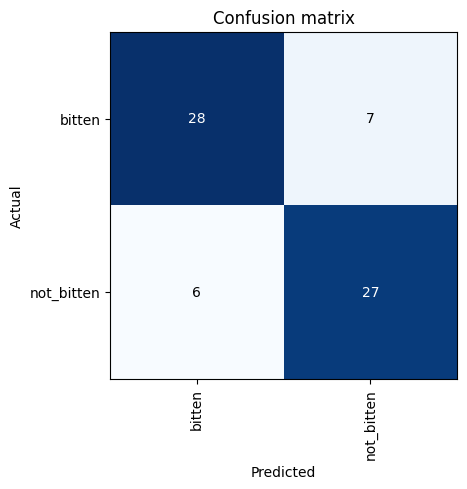

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

#Test the model

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np

In [ ]:
model_path = '/content/drive/MyDrive/nail_data/trained_models/nail_bitten_classifier_2.pkl'
learn = load_learner(model_path)

In [ ]:
img_path = '/content/drive/MyDrive/nail_data/test_data/huien.JPG'
img = PILImage.create(img_path)

In [ ]:
pred_class, pred_idx, probs = learn.predict(img)

In [ ]:
confidence = probs[pred_idx].item() * 100

In [ ]:
title = f"Prediction result: {pred_class} (Confidence coefficient: {confidence:.1f}%)"
print(title)

Prediction result: not_bitten (Confidence coefficient: 98.8%)
